In [2]:
import pandas as pd
df = pd.read_csv('kc-house-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# 1.2. Изучите стоимости недвижимости

In [2]:
print(f'Минимальная цена {df[ 'price'].min()}, максимальная  {df[ 'price'].max()}')

Минимальная цена 75000.0, максимальная  7700000.0


Чтобы цены понятнее отражались на графике, выполняем деление на 1000.

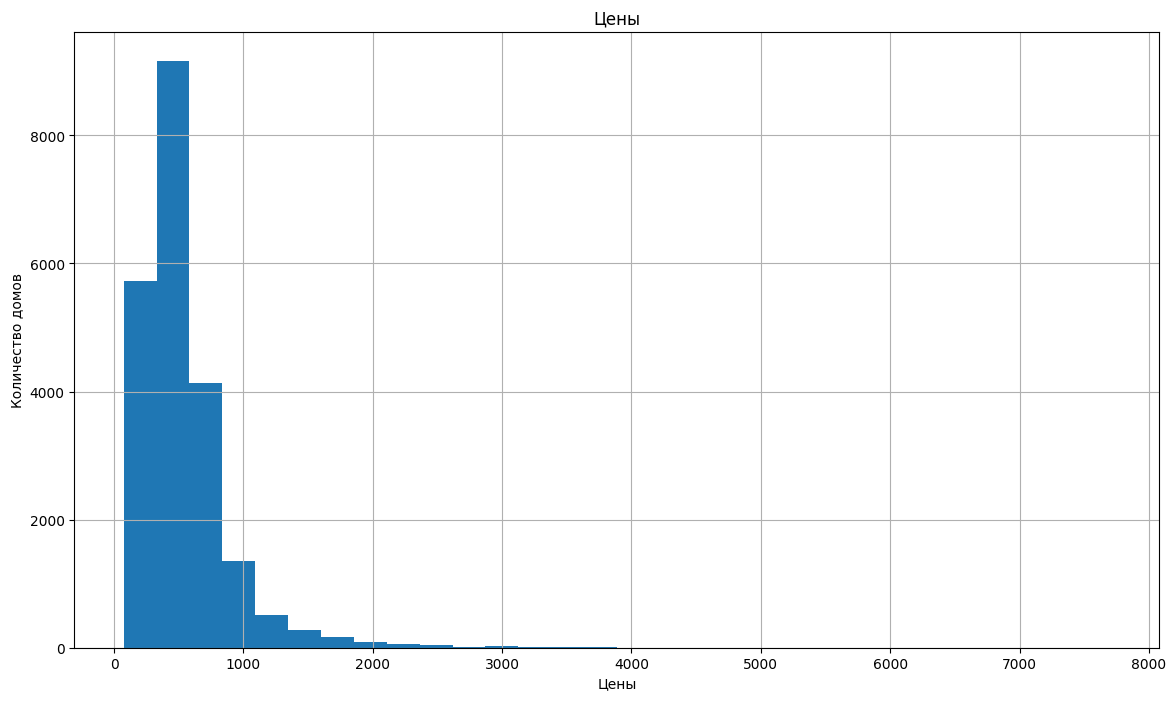

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.hist(df['price']/1000, bins = 30)
plt.title('Цены')
plt.xlabel('Цены')
plt.ylabel('Количество домов')
plt.grid()

<Axes: xlabel='long', ylabel='lat'>

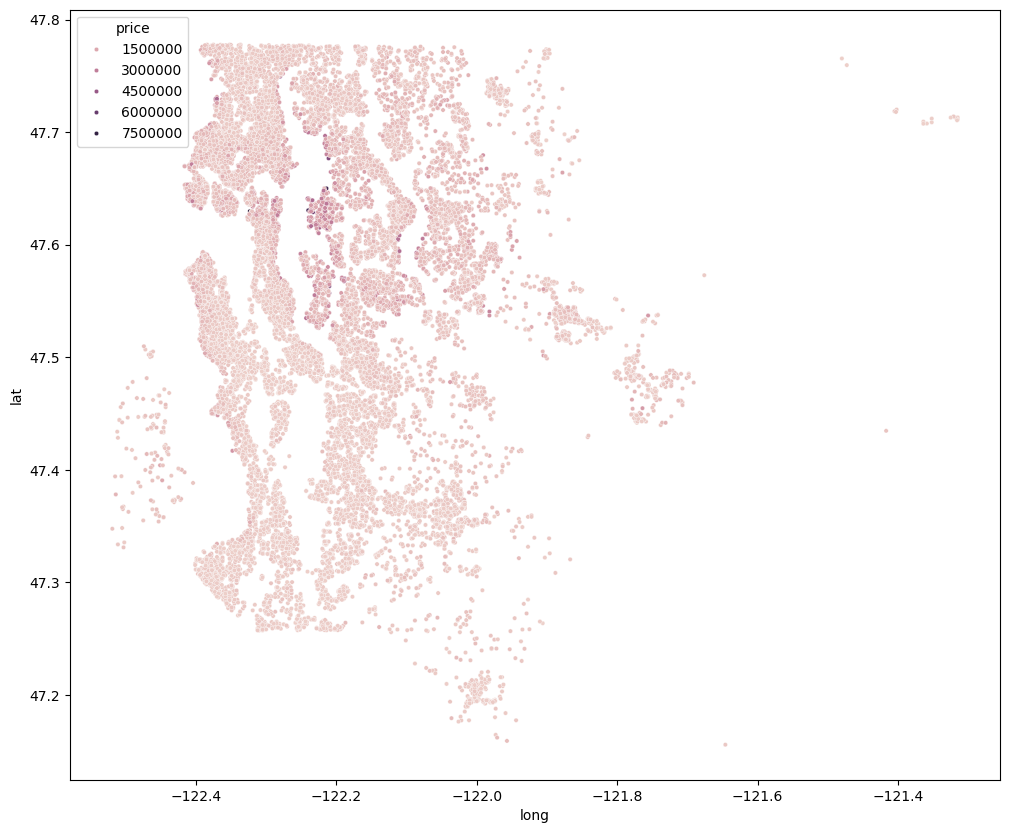

In [7]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.scatterplot(data = df, x="long", y="lat", hue="price", color=".3", s = 10)

Из этого графика можно сделать вывод что самое дорогое жилье находится у водоема.

# 1.3. Изучите распределение квадратуры жилой площади

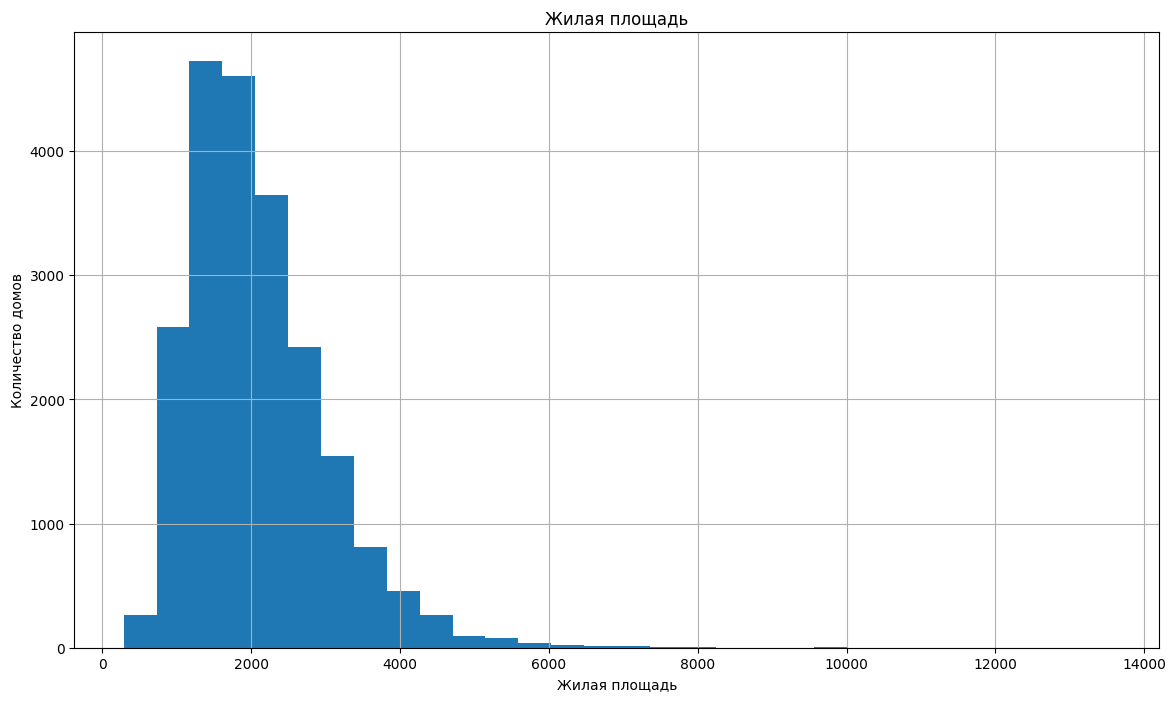

In [29]:
plt.figure(figsize=(14, 8))
plt.hist(df['sqft_living'], bins = 30)
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов')
plt.grid()

<Axes: xlabel='price', ylabel='sqft_living'>

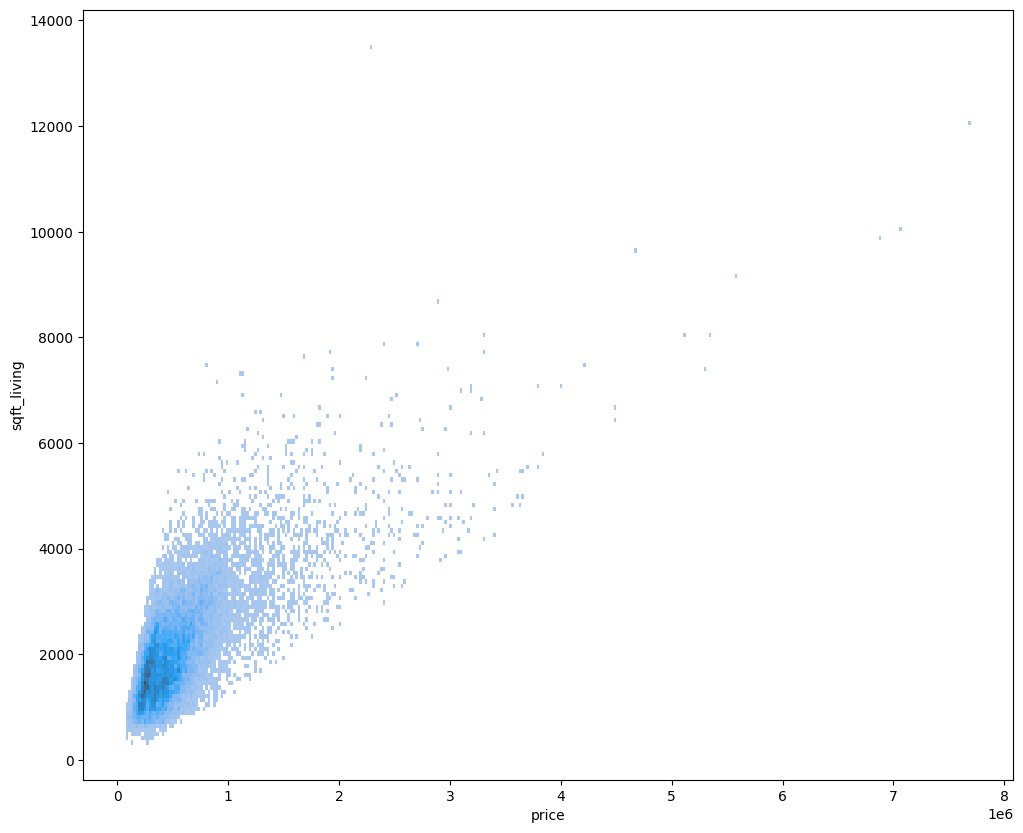

In [33]:
plt.figure(figsize=(12, 10))
sns.histplot(data= df, x ='price' ,y ='sqft_living')

По этому графику явно прослеживается, что чем больше цена, тем больше квадратура жилой площади. Больше всего домов до 2_000_000 и площадью до 4000

# Изучите распределение года постройки

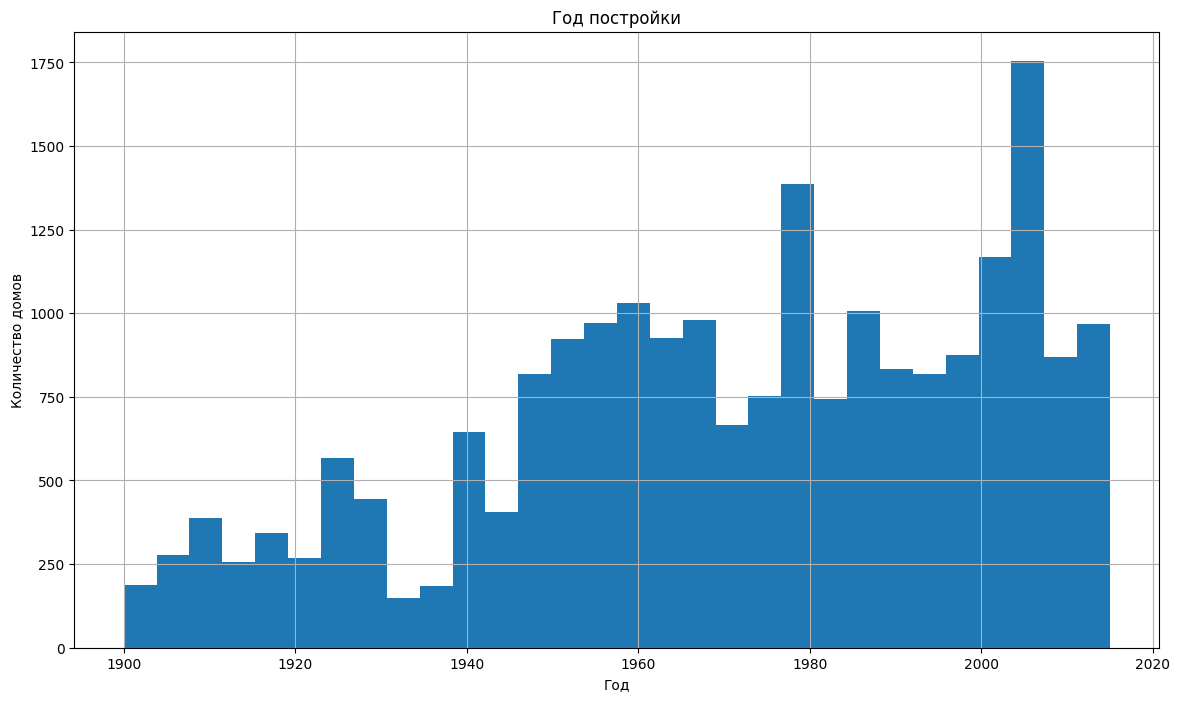

In [5]:
plt.figure(figsize=(14, 8))
plt.hist(df['yr_built'], bins = 30)
plt.title('Год постройки')
plt.xlabel('Год')
plt.ylabel('Количество домов')
plt.grid()

<Axes: xlabel='yr_built', ylabel='price'>

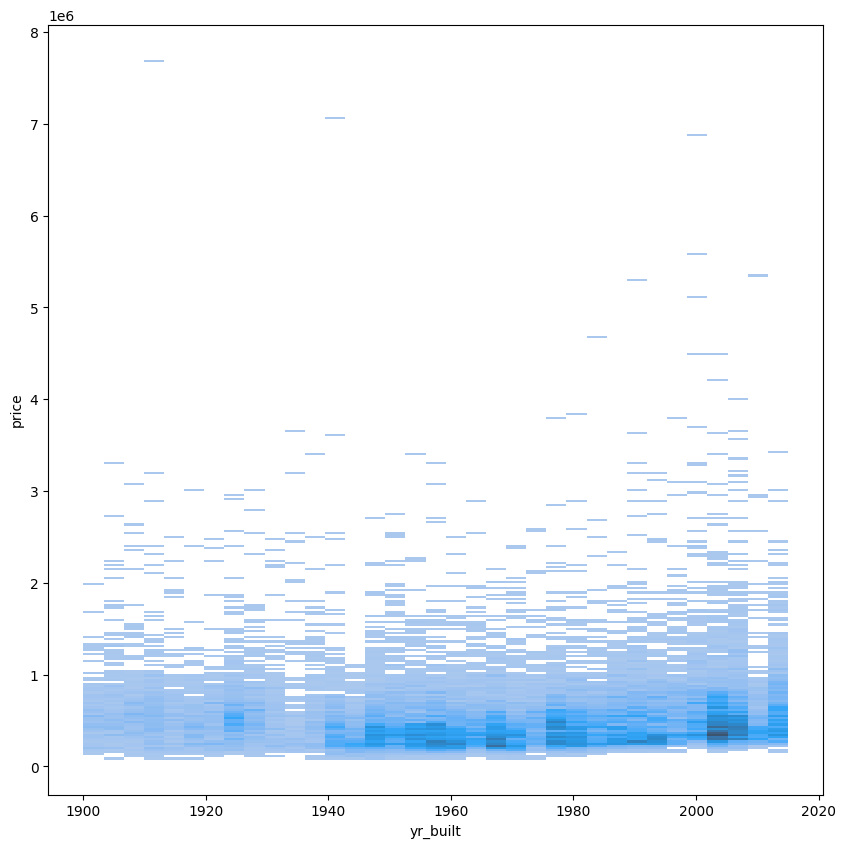

In [48]:
plt.figure(figsize=(10, 10))
sns.histplot(data= df, x ='yr_built' ,y ='price')

Цена дома не имеет прямой зависимости от года постройки

<Figure size 1000x1000 with 0 Axes>

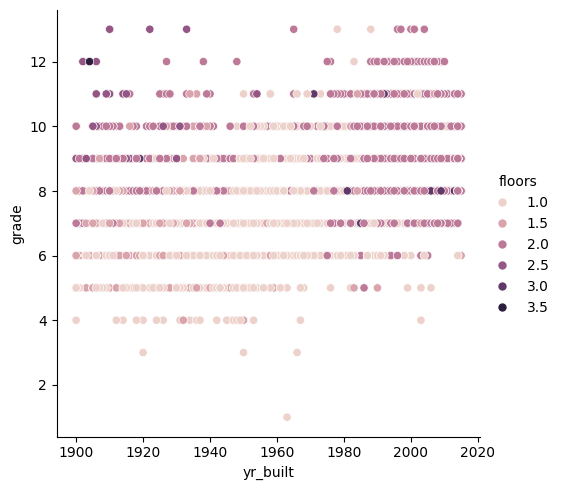

In [20]:
plt.figure(figsize=(10, 10))
sns.relplot(data= df, x ='yr_built' ,y ='grade', hue = 'floors')

с 1980 дома стали строить выше. В период с 1940 по 1980 строились самые низкие дома. Grade в цело выше у свежепостроенных домой

# 2.1. Изучите распределение домов от наличия вида на набережную

Text(0.5, 1.0, 'Вид на море')

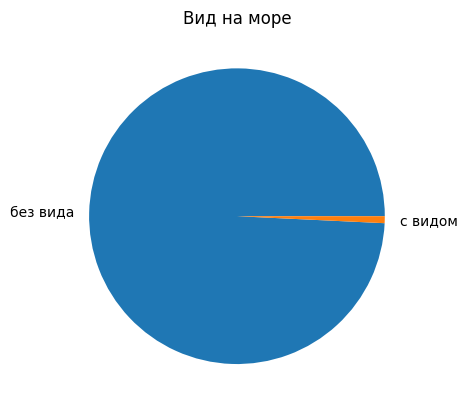

In [26]:
plt.pie(df['waterfront'].value_counts(), labels = ['без вида', 'с видом'])
plt.title('Вид на море')

Домов с видом на море очень мало

# 2.2. Изучите распределение этажности домов

Text(0.5, 1.0, 'Количество этажей')

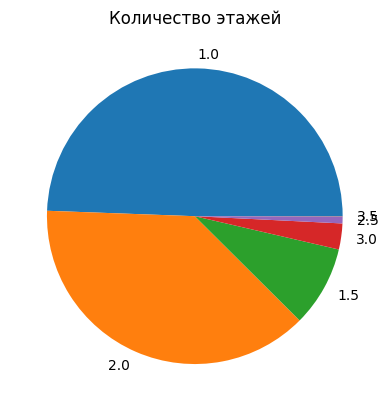

In [44]:
plt.pie(df['floors'].value_counts(),labels = df['floors'].unique(), labeldistance=1.1)
plt.title('Количество этажей')

Почти половину от всех домов состовляют одноэтажные

<Axes: xlabel='floors', ylabel='price'>

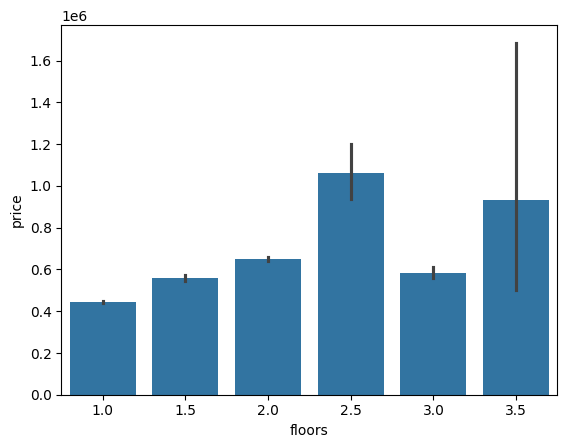

In [46]:
sns.barplot(x="floors", y="price", data=df)

Дома с 2,5 этажами в целом более дорогие

# 2.3. Изучите распределение состояния домов

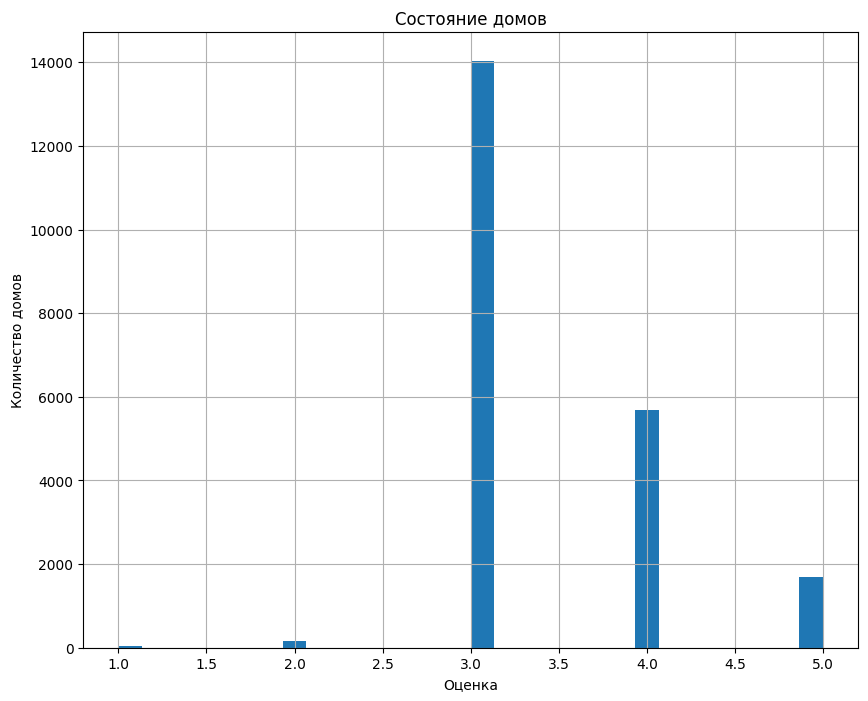

In [51]:
plt.figure(figsize=(10, 8))
plt.hist(df['condition'], bins = 30)
plt.title('Состояние домов')
plt.xlabel('Оценка')
plt.ylabel('Количество домов')
plt.grid()

Больше всего домов со средней оценкой, что еще лучше будет видно на круговой диаграмме

Text(0.5, 1.0, 'Количество этажей')

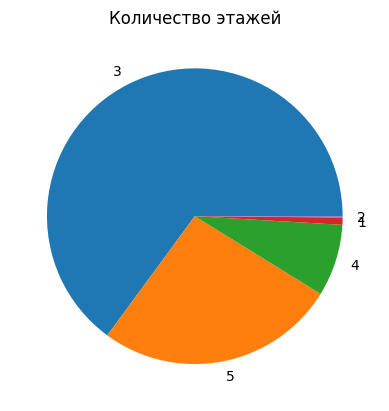

In [53]:
plt.pie(df['condition'].value_counts(),labels = df['condition'].unique(), labeldistance=1.1)
plt.title('Количество этажей')

# Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

<Axes: xlabel='long', ylabel='lat'>

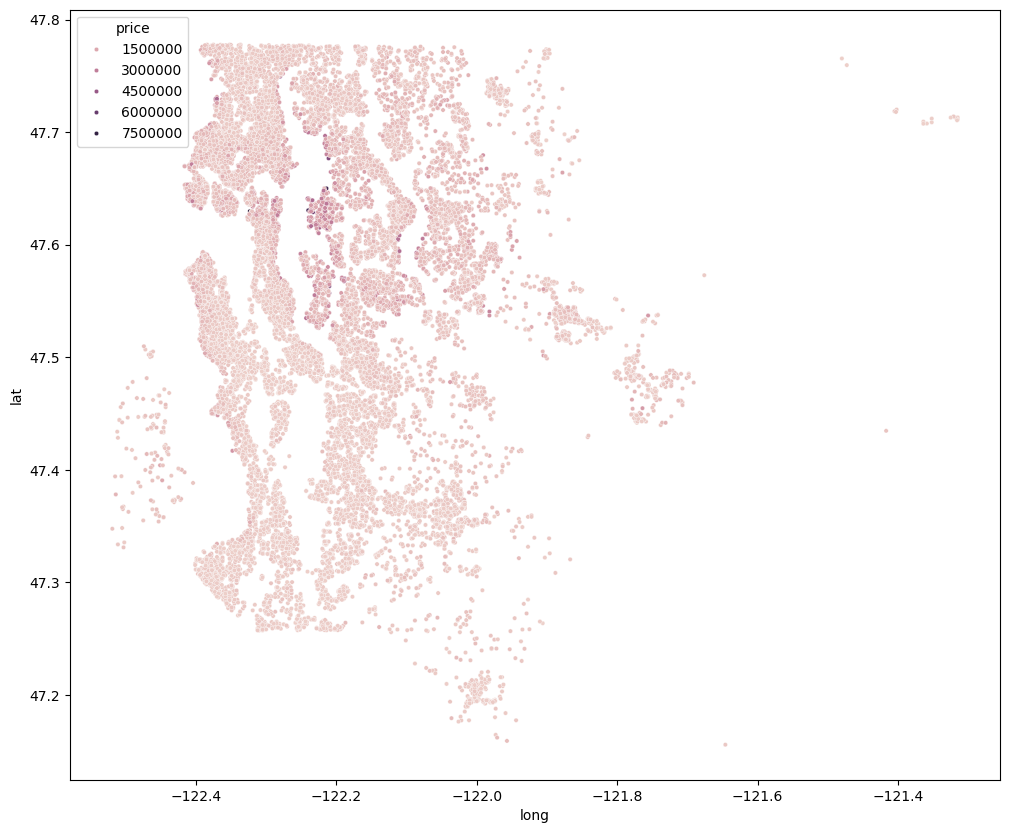

In [56]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data = df, x="long", y="lat", hue="price", color=".3", s = 10)

Из этого графика можно сделать вывод что самое дорогое жилье находится у водоема. В этих местах самые темные точки

<Axes: xlabel='condition', ylabel='price'>

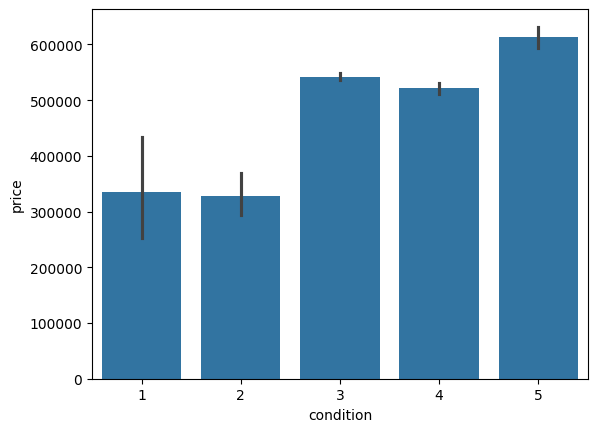

In [75]:
sns.barplot(x="condition", y="price", data=df)

На стоимость сильно влияют только плохие оценки(1,2) состояния. В остальном разница не настолько заметна 

<Axes: xlabel='price', ylabel='sqft_living'>

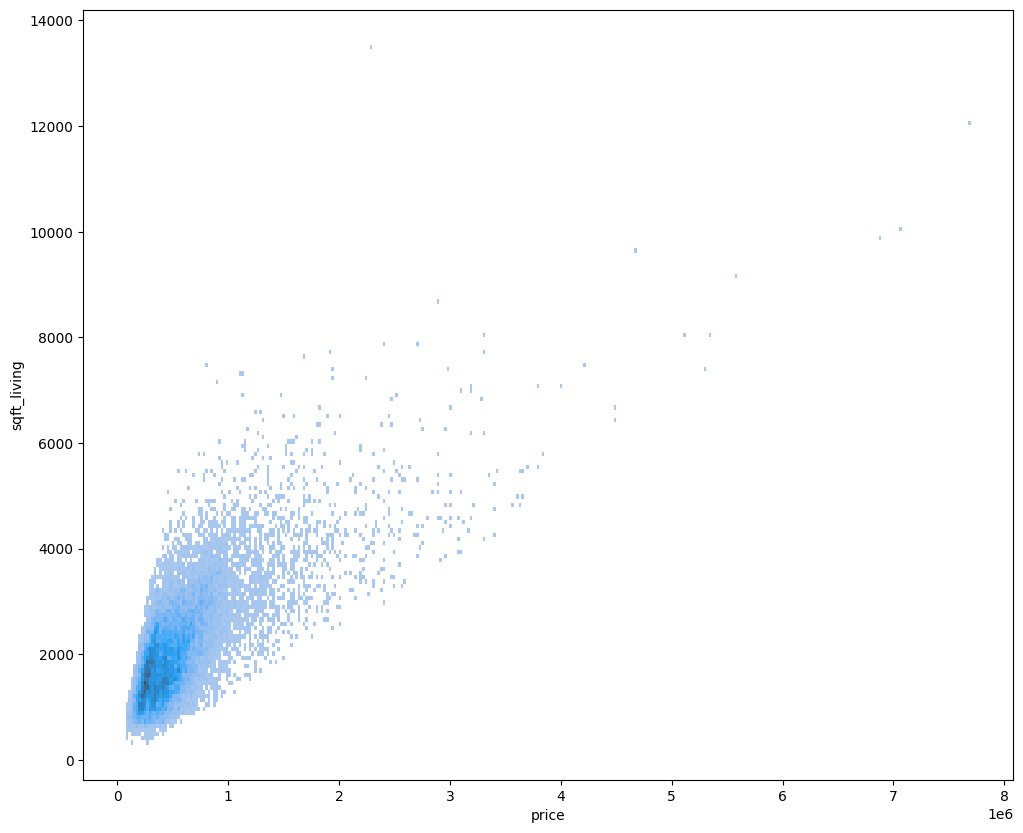

In [59]:
plt.figure(figsize=(12, 10))
sns.histplot(data= df, x ='price' ,y ='sqft_living')

По этому графику явно прослеживается, что чем больше цена, тем больше квадратура жилой площади. Больше всего домов до 2_000_000 и площадью до 4000

<Axes: xlabel='bedrooms', ylabel='price'>

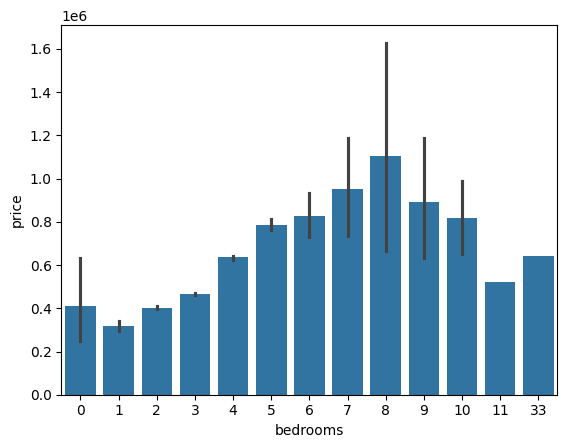

In [80]:
sns.barplot(data= df,  x ='bedrooms' ,y='price')

Дороже всего стоят дома с 8 спальнями, среди них находятся и самые дорогие дома

<Axes: xlabel='waterfront', ylabel='price'>

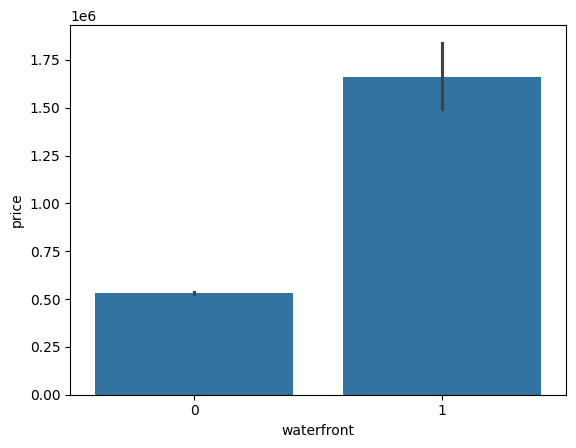

In [72]:
sns.barplot(x="waterfront", y="price", data=df)

Цена домов с видом на море выше